# Applied Machine Learning Mini Project

## Choice of model 
Add explanation for choice of model, 
because it is either yes or no and so on maybe make pros and cons of models.

## Objectives

1. Load and explore the dataset.
2. Preprocess the data, including handling missing values and scaling features.
3. Split the data into training and testing sets.
4. Train a logistic regression model.
5. Train a Random Forest Classifier
6. Evaluate the model using various metrics such as confusion matrix, classification report, ROC curve, and precision-recall curve.
7. Visualize the results to gain insights into the model's performance.

First the needed dependencies are loaded.

In [23]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time as time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_curve, auc, mean_squared_error

The dataset is loaded and checked for missing values, along with differences in the data. 

In [24]:
# Load the dataset
df = pd.read_csv('ai4i2020.csv')

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Check the number of ones vs zeroes in the column 'Machine failure'
machine_failure_counts = df['Machine failure'].value_counts()
print("\nNumber of ones vs zeroes in 'Machine failure' column:\n", machine_failure_counts)

Missing values in each column:
 UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

Number of ones vs zeroes in 'Machine failure' column:
 Machine failure
0    9661
1     339
Name: count, dtype: int64


In [25]:
# Define the target variable and feature variables
X = df.drop(columns=['Machine failure', 'Product ID', 'Type', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
y = df['Machine failure']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
def grid_search_cv(X_train_scaled, y_train):
    param_grid = [
        {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['lbfgs']},
        {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1'], 'solver': ['liblinear']},
        {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2', 'elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.5, 0.7, 0.9]}
    ]
    
    logReg = LogReg(random_state=42)
    grid_search = GridSearchCV(
        logReg,
        param_grid,
        cv=5,
        n_jobs=-1,
        scoring='f1'
    )
    
    
    start_time = time.time()
    grid_search.fit(X_train_scaled, y_train)
    duration = time.time() - start_time
    
    return grid_search.best_estimator_, (grid_search.best_params_, grid_search.best_score_, duration)

grid_result, returns = grid_search_cv(X_train_scaled, y_train)
print(returns)

({'C': 1, 'l1_ratio': 0.5, 'penalty': 'l1', 'solver': 'saga'}, 0.29460478457989414, 1.1136112213134766)


c:\Users\ander\anaconda3\envs\applied\lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.64      0.26      0.37        61

    accuracy                           0.97      2000
   macro avg       0.81      0.63      0.68      2000
weighted avg       0.97      0.97      0.97      2000



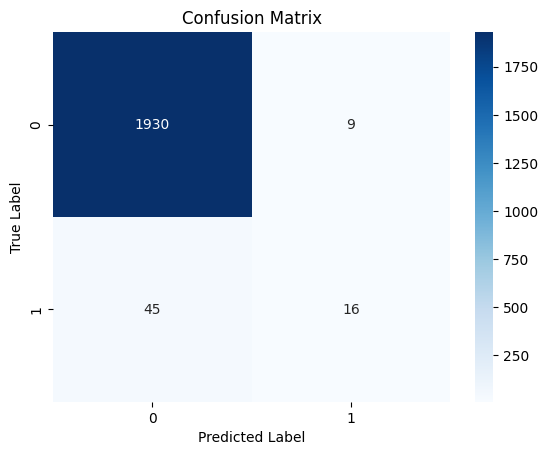

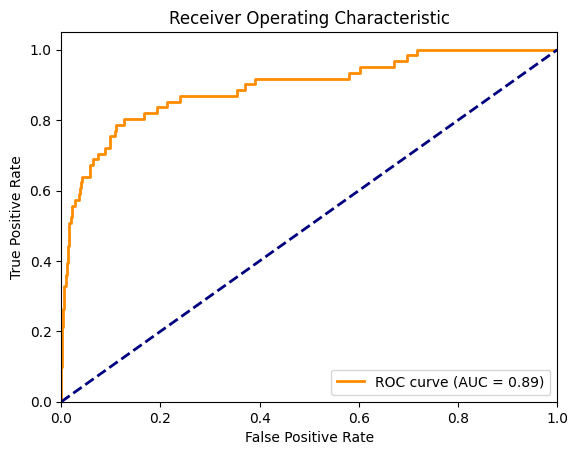

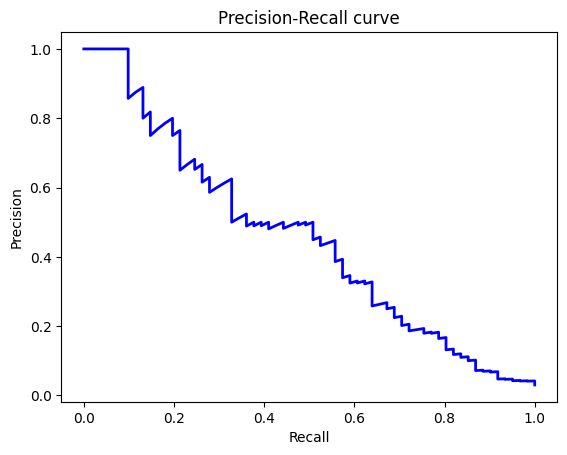

                   Feature  Coefficient
4              Torque [Nm]     2.788579
3   Rotational speed [rpm]     2.076118
1      Air temperature [K]     1.562621
5          Tool wear [min]     0.832146
0                      UDI     0.077312
2  Process temperature [K]    -1.090844


In [ ]:
y_pred = grid_result.predict(X_test_scaled)
y_pred_proba = grid_result.predict_proba(X_test_scaled)[:, 1]

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()



coefficients = grid_result.coef_[0]  # Access the best estimator's coefficients
feature_names = X.columns  # Ensure feature names are taken from the correct DataFrame

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print(feature_importances)
